In [66]:
!pip install tensorflow scikit-learn matplotlib seaborn --quiet

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [68]:
digits = datasets.load_digits()
X = digits.images  # shape: (1797, 8, 8)
y = digits.target  # shape: (1797,)

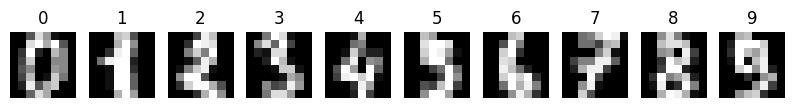

In [69]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

In [70]:
X = X / 16.0  # Normalize pixel values to [0, 1]
X = X.reshape(-1, 8, 8, 1)  # Add channel dimension
y_cat = to_categorical(y, num_classes=10)  # One-hot encode the labels
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [71]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(8, 8, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (2, 2), activation='relu', padding='same'),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')  # 10 output classes
])

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5384 - loss: 1.5200 - val_accuracy: 0.1736 - val_loss: 2.2219
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9551 - loss: 0.1584 - val_accuracy: 0.2014 - val_loss: 2.2132
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9726 - loss: 0.0846 - val_accuracy: 0.1389 - val_loss: 2.2317
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9729 - loss: 0.1039 - val_accuracy: 0.1389 - val_loss: 2.0807
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9861 - loss: 0.0427 - val_accuracy: 0.2083 - val_loss: 1.9265
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.5069 - val_loss: 1.6277
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9958 - loss: 0.0149 - val_accuracy: 0.5972 - val_loss: 1.2054
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9919 - loss: 0.0288 - val_accuracy: 0.6944 - v

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9633 - loss: 0.1452

Test Accuracy: 0.9583


In [75]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


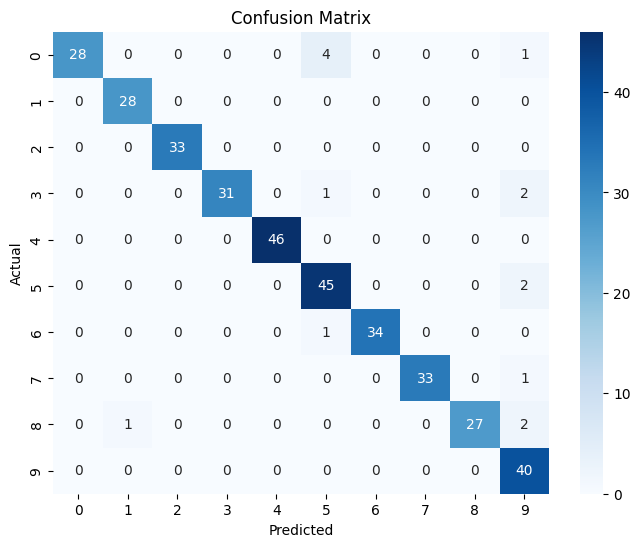

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [77]:
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.91      0.95        34
           4       1.00      1.00      1.00        46
           5       0.88      0.96      0.92        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.90      0.95        30
           9       0.83      1.00      0.91        40

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

